<a href="https://colab.research.google.com/github/britneh/DS-Unit-1-Sprint-2-Statistics/blob/master/Britne_H_LS_DS_122_Sampling_Confidence_Intervals_and_Hypothesis_Testing_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Assignment - Build a confidence interval

A confidence interval refers to a neighborhood around some point estimate, the size of which is determined by the desired p-value. For instance, we might say that 52% of Americans prefer tacos to burritos, with a 95% confidence interval of +/- 5%.

52% (0.52) is the point estimate, and +/- 5% (the interval $[0.47, 0.57]$) is the confidence interval. "95% confidence" means a p-value $\leq 1 - 0.95 = 0.05$.

In this case, the confidence interval includes $0.5$ - which is the natural null hypothesis (that half of Americans prefer tacos and half burritos, thus there is no clear favorite). So in this case, we could use the confidence interval to report that we've failed to reject the null hypothesis.

But providing the full analysis with a confidence interval, including a graphical representation of it, can be a helpful and powerful way to tell your story. Done well, it is also more intuitive to a layperson than simply saying "fail to reject the null hypothesis" - it shows that in fact the data does *not* give a single clear result (the point estimate) but a whole range of possibilities.

How is a confidence interval built, and how should it be interpreted? It does *not* mean that 95% of the data lies in that interval - instead, the frequentist interpretation is "if we were to repeat this experiment 100 times, we would expect the average result to lie in this interval ~95 times."

For a 95% confidence interval and a normal(-ish) distribution, you can simply remember that +/-2 standard deviations contains 95% of the probability mass, and so the 95% confidence interval based on a given sample is centered at the mean (point estimate) and has a range of +/- 2 (or technically 1.96) standard deviations.

Different distributions/assumptions (90% confidence, 99% confidence) will require different math, but the overall process and interpretation (with a frequentist approach) will be the same.

Your assignment - using the data from the prior module ([congressional voting records](https://archive.ics.uci.edu/ml/datasets/Congressional+Voting+Records)):


### Confidence Intervals:
1. Generate and numerically represent a confidence interval
2. Graphically (with a plot) represent the confidence interval
3. Interpret the confidence interval - what does it tell you about the data and its distribution?

### Chi-squared tests:
4. Take a dataset that we have used in the past in class that has **categorical** variables. Pick two of those categorical variables and run a chi-squared tests on that data
  - By hand using Numpy
  - In a single line using Scipy


In [1]:
import pandas as pd
from google.colab import files
files.upload()

{}

In [2]:
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [3]:
column_headers = ['party','handicapped-infants','water-project',
                  'budget','physician-fee-freeze', 'el-salvador-aid',
                  'religious-groups','anti-satellite-ban',
                  'aid-to-contras','mx-missile','immigration',
                  'synfuels', 'education', 'right-to-sue','crime','duty-free',
                  'south-africa']
df = pd.read_csv('house-votes-84.data',names = column_headers)
df.head()

,party,handicapped-infants,water-project,budget,physician-fee-freeze,el-salvador-aid,religious-groups,anti-satellite-ban,aid-to-contras,mx-missile,immigration,synfuels,education,right-to-sue,crime,duty-free,south-africa
0,republican,n,y,n,y,y,y,n,n,n,y,?,y,y,y,n,y
1,republican,n,y,n,y,y,y,n,n,n,n,n,y,y,y,n,?
2,democrat,?,y,y,?,y,y,n,n,n,n,y,n,y,y,n,n
3,democrat,n,y,y,n,?,y,n,n,n,n,y,n,y,n,n,y
4,democrat,y,y,y,n,y,y,n,n,n,n,y,?,y,y,y,y


In [4]:
df = df.replace({'y': 1, 'n': 0, '?': np.NaN})
df.head()

,party,handicapped-infants,water-project,budget,physician-fee-freeze,el-salvador-aid,religious-groups,anti-satellite-ban,aid-to-contras,mx-missile,immigration,synfuels,education,right-to-sue,crime,duty-free,south-africa
0,republican,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,NaN,1.0,1.0,1.0,0.0,1.0
1,republican,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,NaN
2,democrat,NaN,1.0,1.0,NaN,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0
3,democrat,0.0,1.0,1.0,0.0,NaN,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
4,democrat,1.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,NaN,1.0,1.0,1.0,1.0


In [0]:
df = df.dropna()

In [0]:
dem = df[df['party']=='democrat']
rep = df[df['party']=='republican']

In [17]:
dem.head()

,party,handicapped-infants,water-project,budget,physician-fee-freeze,el-salvador-aid,religious-groups,anti-satellite-ban,aid-to-contras,mx-missile,immigration,synfuels,education,right-to-sue,crime,duty-free,south-africa
5,democrat,0.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0
19,democrat,1.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0
23,democrat,1.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
25,democrat,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0
26,democrat,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0


In [18]:
data = dem['immigration']
data
data.head()

5     0.0
19    0.0
23    0.0
25    1.0
26    0.0
Name: immigration, dtype: float64

**bold text**
#Generate and numerically represent a confidence interval




In [0]:
def confidence_interval(data, confidence = .95):
  sample = np.array(data)
  s=np.std(sample, ddof =1)
  n = len(sample)
  standard_error = s/np.sqrt(n)
  t = stats.t.ppf((1+confidence)/2, n-1)
  margin_of_error = t*standard_error
  x_bar = np.mean(sample)
  lower_bound = x_bar - margin_of_error
  upper_bound = x_bar + margin_of_error
  return(lower_bound, x_bar, upper_bound)

In [20]:
confidence_interval(data, confidence = .95)

(0.44320399355877216, 0.532258064516129, 0.6213121354734858)


#Graphically (with a plot) represent the confidence interval




In [22]:
lower, mean, upper = confidence_interval(data)

print(lower)
print(mean)
print(upper)

0.44320399355877216
0.532258064516129
0.6213121354734858


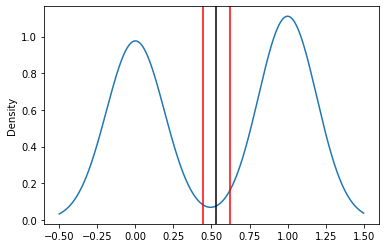

In [26]:
data.plot.density();
plt.axvline(x=lower, color='red')
plt.axvline(x=mean, color='black')
plt.axvline(x=upper, color='red')
plt.show()

#Interpret the confidence interval - what does it tell you about the data and its distribution?

We can be 95% certain that the proportion of dems in favor of immigration falls between .42 and .62

#Pick two of those categorical variables and run a chi-squared tests on that data

In [28]:
adult = pd.read_csv('https://raw.githubusercontent.com/ryanleeallred/datasets/master/adult.csv', na_values=" ?",)
print(adult.shape)
adult.head()

(32561, 15)


,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [31]:
adult['sex'].value_counts()

 Male      21790
 Female    10771
Name: sex, dtype: int64

In [38]:
#Observed value calculation
observed = pd.crosstab(df['sex'], df['hours-per-week'])

observed

hours-per-week,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,...,55,56,57,58,59,60,61,62,63,64,65,66,67,68,70,72,73,74,75,76,77,78,80,81,82,84,85,86,87,88,89,90,91,92,94,95,96,97,98,99
sex,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Female,10,14,14,32,32,31,14,78,10,130,5,93,11,20,236,113,16,36,11,644,17,22,17,131,366,13,19,53,5,530,4,161,26,20,656,132,89,274,22,4922,...,105,21,5,7,1,203,0,4,3,5,34,1,1,1,40,13,1,0,12,0,0,1,24,1,1,5,1,0,0,0,0,4,0,0,0,0,0,0,0,19
Male,10,18,25,22,28,33,12,67,8,148,6,80,12,14,168,92,13,39,3,580,7,22,4,121,308,17,11,33,2,619,1,105,13,8,641,88,60,202,16,10295,...,589,76,12,21,4,1272,2,14,7,9,210,16,3,11,251,58,1,1,54,3,6,7,109,2,0,40,12,2,1,2,2,25,3,1,1,2,5,2,11,66


In [39]:
observed_margins = pd.crosstab(df['sex'], df['hours-per-week'], margins=True)
observed_margins

hours-per-week,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,...,56,57,58,59,60,61,62,63,64,65,66,67,68,70,72,73,74,75,76,77,78,80,81,82,84,85,86,87,88,89,90,91,92,94,95,96,97,98,99,All
sex,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Female,10,14,14,32,32,31,14,78,10,130,5,93,11,20,236,113,16,36,11,644,17,22,17,131,366,13,19,53,5,530,4,161,26,20,656,132,89,274,22,4922,...,21,5,7,1,203,0,4,3,5,34,1,1,1,40,13,1,0,12,0,0,1,24,1,1,5,1,0,0,0,0,4,0,0,0,0,0,0,0,19,10771
Male,10,18,25,22,28,33,12,67,8,148,6,80,12,14,168,92,13,39,3,580,7,22,4,121,308,17,11,33,2,619,1,105,13,8,641,88,60,202,16,10295,...,76,12,21,4,1272,2,14,7,9,210,16,3,11,251,58,1,1,54,3,6,7,109,2,0,40,12,2,1,2,2,25,3,1,1,2,5,2,11,66,21790
All,20,32,39,54,60,64,26,145,18,278,11,173,23,34,404,205,29,75,14,1224,24,44,21,252,674,30,30,86,7,1149,5,266,39,28,1297,220,149,476,38,15217,...,97,17,28,5,1475,2,18,10,14,244,17,4,12,291,71,2,1,66,3,6,8,133,3,1,45,13,2,1,2,2,29,3,1,1,2,5,2,11,85,32561


In [61]:
#1 hour of work, female: - does not match up
(10771)*(20)/32561

6.615890175363164

In [57]:
#Expected value calculation
row_sums = observed_margins.iloc[0:2, 94:].values
row_sums = row_sums.T[0]

row_sums

array([10771, 21790])

In [58]:
col_sums = observed_margins.iloc[2:, 0:94].values
col_sums = col_sums[0]

col_sums

array([   20,    32,    39,    54,    60,    64,    26,   145,    18,
         278,    11,   173,    23,    34,   404,   205,    29,    75,
          14,  1224,    24,    44,    21,   252,   674,    30,    30,
          86,     7,  1149,     5,   266,    39,    28,  1297,   220,
         149,   476,    38, 15217,    36,   219,   151,   212,  1824,
          82,    49,   517,    29,  2819,    13,   138,    25,    41,
         694,    97,    17,    28,     5,  1475,     2,    18,    10,
          14,   244,    17,     4,    12,   291,    71,     2,     1,
          66,     3,     6,     8,   133,     3,     1,    45,    13,
           2,     1,     2,     2,    29,     3,     1,     1,     2,
           5,     2,    11,    85])

In [59]:
total_total = adult.shape[0]
total_total

32561

In [60]:
expected = []
for i in range(len(row_sums)):
  expected_row = []
  for column in col_sums:
    expected_val = column*row_sums[i]/total_total
    expected_row.append(expected_val)
  expected.append(expected_row)

expected = np.array(expected)
print(expected.shape)  
print(expected)

(2, 94)
[[6.61589018e+00 1.05854243e+01 1.29009858e+01 1.78629035e+01
  1.98476705e+01 2.11708486e+01 8.60065723e+00 4.79652038e+01
  5.95430116e+00 9.19608734e+01 3.63873960e+00 5.72274500e+01
  7.60827370e+00 1.12470133e+01 1.33640982e+02 6.78128743e+01
  9.59304075e+00 2.48095882e+01 4.63112312e+00 4.04892479e+02
  7.93906821e+00 1.45549584e+01 6.94668468e+00 8.33602162e+01
  2.22955499e+02 9.92383526e+00 9.92383526e+00 2.84483278e+01
  2.31556156e+00 3.80082891e+02 1.65397254e+00 8.79913393e+01
  1.29009858e+01 9.26224625e+00 4.29040478e+02 7.27747919e+01
  4.92883818e+01 1.57458186e+02 1.25701913e+01 5.03370004e+03
  1.19086023e+01 7.24439974e+01 4.99499708e+01 7.01284359e+01
  6.03369184e+02 2.71251497e+01 1.62089309e+01 1.71020761e+02
  9.59304075e+00 9.32509720e+02 4.30032861e+00 4.56496422e+01
  8.26986272e+00 1.35625749e+01 2.29571389e+02 3.20870674e+01
  5.62350665e+00 9.26224625e+00 1.65397254e+00 4.87921900e+02
  6.61589018e-01 5.95430116e+00 3.30794509e+00 4.63112312e+00


In [62]:
chi2 = ((observed-expected)**2 / expected).sum().sum()

chi2

2546.571725831992

In [63]:
chi2, p_value, dof, expected = stats.chi2_contingency(observed)

print("chi2 statistic", chi2)
print("p value", p_value)
print("degrees of freedom",dof)
print("expected frequencies table", expected)

chi2 statistic 2546.5717258319914
p value 0.0
degrees of freedom 93
expected frequencies table [[6.61589018e+00 1.05854243e+01 1.29009858e+01 1.78629035e+01
  1.98476705e+01 2.11708486e+01 8.60065723e+00 4.79652038e+01
  5.95430116e+00 9.19608734e+01 3.63873960e+00 5.72274500e+01
  7.60827370e+00 1.12470133e+01 1.33640982e+02 6.78128743e+01
  9.59304075e+00 2.48095882e+01 4.63112312e+00 4.04892479e+02
  7.93906821e+00 1.45549584e+01 6.94668468e+00 8.33602162e+01
  2.22955499e+02 9.92383526e+00 9.92383526e+00 2.84483278e+01
  2.31556156e+00 3.80082891e+02 1.65397254e+00 8.79913393e+01
  1.29009858e+01 9.26224625e+00 4.29040478e+02 7.27747919e+01
  4.92883818e+01 1.57458186e+02 1.25701913e+01 5.03370004e+03
  1.19086023e+01 7.24439974e+01 4.99499708e+01 7.01284359e+01
  6.03369184e+02 2.71251497e+01 1.62089309e+01 1.71020761e+02
  9.59304075e+00 9.32509720e+02 4.30032861e+00 4.56496422e+01
  8.26986272e+00 1.35625749e+01 2.29571389e+02 3.20870674e+01
  5.62350665e+00 9.26224625e+00 1.653

## Stretch goals:

1. Write a summary of your findings, mixing prose and math/code/results. *Note* - yes, this is by definition a political topic. It is challenging but important to keep your writing voice *neutral* and stick to the facts of the data. Data science often involves considering controversial issues, so it's important to be sensitive about them (especially if you want to publish).
2. Apply the techniques you learned today to your project data or other data of your choice, and write/discuss your findings here.
3. Refactor your code so it is elegant, readable, and can be easily run for all issues.

## Resources

- [Interactive visualize the Chi-Squared test](https://homepage.divms.uiowa.edu/~mbognar/applets/chisq.html)
- [Calculation of Chi-Squared test statistic](https://en.wikipedia.org/wiki/Pearson%27s_chi-squared_test)
- [Visualization of a confidence interval generated by R code](https://commons.wikimedia.org/wiki/File:Confidence-interval.svg)
- [Expected value of a squared standard normal](https://math.stackexchange.com/questions/264061/expected-value-calculation-for-squared-normal-distribution) (it's 1 - which is why the expected value of a Chi-Squared with $n$ degrees of freedom is $n$, as it's the sum of $n$ squared standard normals)